In [1]:
import requests
from Config import ConsumerKey as key

In [2]:
key

'NXVTMDSSC9WNYXT5YXWIUZ2CEUG2DZSP'

In [3]:
# define our endpoint
endpoint = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')

In [4]:
# definte our payload
payload = {'apikey':key,
          'periodType':'month',
          'period':'1',
          'frequencyType':'daily',
          'frequency':'1',
          'startDate':'1651285293',
          'needExtendedHoursData':'true'}

In [5]:
# make a request
content = requests.get(url = endpoint, params = payload)

In [6]:
# convert it to a dictionary
data = content.json()

In [7]:
import pandas as pd

In [8]:
df2 = pd.json_normalize(data['candles']) 

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = df2['datetime']
y = df2['close']

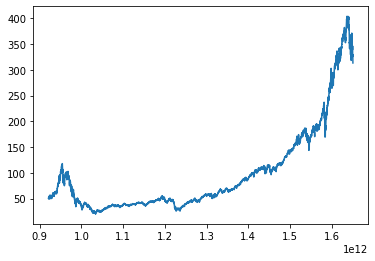

In [11]:
plt.plot(x,y)

In [12]:
import datetime

In [13]:
df = df2.copy()

In [14]:
df['datetime'] = df['datetime'].floordiv(1000)

In [15]:
def datetimeconvert(x):
    return datetime.datetime.fromtimestamp(x)

In [16]:
df['datetime'] = df['datetime'].apply(datetimeconvert)

In [17]:
x = df['datetime']
y = df['close']

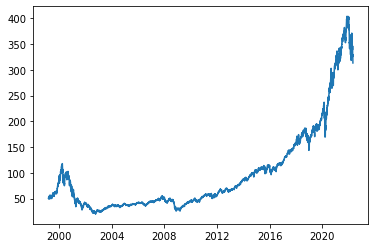

In [18]:
plt.plot(x,y)

In [27]:
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/chains'.format('QQQ')
endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/chains'

In [28]:
payload2 = {'apikey':key,
           'symbol':'QQQ',
           'strikeCount':'30',
           'fromDate':'2022-04-01'}

In [29]:
content2 = requests.get(url = endpoint2, params = payload2)

In [30]:
data2 = content2.json()

In [32]:
optionsChain = pd.json_normalize(data2) 

In [33]:
optionsChain

,symbol,status,underlying,strategy,interval,isDelayed,isIndex,interestRate,underlyingPrice,volatility,...,putExpDateMap.2024-01-19:627.345.0,putExpDateMap.2024-01-19:627.350.0,putExpDateMap.2024-01-19:627.355.0,putExpDateMap.2024-01-19:627.360.0,putExpDateMap.2024-01-19:627.365.0,putExpDateMap.2024-01-19:627.370.0,putExpDateMap.2024-01-19:627.375.0,putExpDateMap.2024-01-19:627.380.0,putExpDateMap.2024-01-19:627.385.0,putExpDateMap.2024-01-19:627.390.0
0,QQQ,SUCCESS,None,SINGLE,0.0,True,False,0.1,318.085,29.0,...,"[{'putCall': 'PUT', 'symbol': 'QQQ_011924P345'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P350'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P355'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P360'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P365'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P370'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P375'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P380'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P385'...","[{'putCall': 'PUT', 'symbol': 'QQQ_011924P390'..."


In [36]:
for i in optionsChain.columns:
    print(i)

symbol
status
underlying
strategy
interval
isDelayed
isIndex
interestRate
underlyingPrice
volatility
daysToExpiration
numberOfContracts
callExpDateMap.2022-05-02:0.304.0
callExpDateMap.2022-05-02:0.305.0
callExpDateMap.2022-05-02:0.306.0
callExpDateMap.2022-05-02:0.307.0
callExpDateMap.2022-05-02:0.308.0
callExpDateMap.2022-05-02:0.309.0
callExpDateMap.2022-05-02:0.310.0
callExpDateMap.2022-05-02:0.311.0
callExpDateMap.2022-05-02:0.312.0
callExpDateMap.2022-05-02:0.313.0
callExpDateMap.2022-05-02:0.314.0
callExpDateMap.2022-05-02:0.315.0
callExpDateMap.2022-05-02:0.316.0
callExpDateMap.2022-05-02:0.317.0
callExpDateMap.2022-05-02:0.318.0
callExpDateMap.2022-05-02:0.319.0
callExpDateMap.2022-05-02:0.320.0
callExpDateMap.2022-05-02:0.321.0
callExpDateMap.2022-05-02:0.322.0
callExpDateMap.2022-05-02:0.323.0
callExpDateMap.2022-05-02:0.324.0
callExpDateMap.2022-05-02:0.325.0
callExpDateMap.2022-05-02:0.326.0
callExpDateMap.2022-05-02:0.327.0
callExpDateMap.2022-05-02:0.328.0
callExpDateMap

In [41]:
optionsChain['callExpDateMap.2022-05-02:0.304.0']

0    [{'putCall': 'CALL', 'symbol': 'QQQ_050222C304...
Name: callExpDateMap.2022-05-02:0.304.0, dtype: object

In [50]:
# counter=0
# for i in range(12,1812):
#     counter+=1
#     print(i)
# print(counter)

In [54]:
len(optionsChain.transpose())-12

1800

In [62]:
categories = ['putCall','symbol', 'volatility','delta','gamma',
              'theta','vega','rho','openInterest','strikePrice']

In [65]:
optionsChain.iat[0,12][0].get('putCall')

'CALL'

In [68]:
for i in range(len(optionsChain.transpose())-12):
    print(optionsChain.iat[0, i+12][0])

{'putCall': 'CALL', 'symbol': 'QQQ_050222C304', 'description': 'QQQ May 2 2022 304 Call', 'exchangeName': 'OPR', 'bid': 12.07, 'ask': 15.52, 'last': 13.15, 'mark': 0.0, 'bidSize': 151, 'askSize': 22, 'bidAskSize': '151X22', 'lastSize': 0, 'highPrice': 13.15, 'lowPrice': 6.44, 'openPrice': 0.0, 'closePrice': 10.38, 'totalVolume': 190, 'tradeDate': None, 'tradeTimeInLong': 1651520907447, 'quoteTimeInLong': 1651522499848, 'netChange': 2.77, 'volatility': 0.0, 'delta': 0.0, 'gamma': 0.0, 'theta': 0.0, 'vega': 0.0, 'rho': 0.0, 'openInterest': 10, 'timeValue': -1.33, 'theoreticalOptionValue': 0.0, 'theoreticalVolatility': 29.0, 'optionDeliverablesList': None, 'strikePrice': 304.0, 'expirationDate': 1651521600000, 'daysToExpiration': 0, 'expirationType': 'R', 'lastTradingDay': 1651536000000, 'multiplier': 100.0, 'settlementType': ' ', 'deliverableNote': '', 'isIndexOption': None, 'percentChange': 26.73, 'markChange': -10.38, 'markPercentChange': -100.0, 'intrinsicValue': 14.48, 'nonStandard':

In [74]:
selected = pd.DataFrame(columns = categories, dtype = object)

In [75]:
selected

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice


In [81]:
for i in range(len(optionsChain.transpose())-12):
    for j in categories:
        # iterate and put values into 'selected' dataframe
        selected.at[i, j] = optionsChain.iat[0, i+12][0].get(j)

In [82]:
selected

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice
0,CALL,QQQ_050222C304,0,0,0,0,0,0,10,304
1,CALL,QQQ_050222C305,0,0,0,0,0,0,35,305
2,CALL,QQQ_050222C306,0,0,0,0,0,0,20,306
3,CALL,QQQ_050222C307,0,0,0,0,0,0,6,307
4,CALL,QQQ_050222C308,0,0,0,0,0,0,22,308
...,...,...,...,...,...,...,...,...,...,...
1795,PUT,QQQ_011924P370,24.204,-0.621,0.004,-0.023,1.633,-3.029,325,370
1796,PUT,QQQ_011924P375,24.015,-0.642,0.004,-0.022,1.604,-3.037,324,375
1797,PUT,QQQ_011924P380,23.826,-0.663,0.004,-0.021,1.569,-3.031,1769,380
1798,PUT,QQQ_011924P385,23.648,-0.683,0.004,-0.02,1.53,-3.013,1931,385


In [42]:
optionsChain.iat[0,12]

[{'putCall': 'CALL',
  'symbol': 'QQQ_050222C304',
  'description': 'QQQ May 2 2022 304 Call',
  'exchangeName': 'OPR',
  'bid': 12.07,
  'ask': 15.52,
  'last': 13.15,
  'mark': 0.0,
  'bidSize': 151,
  'askSize': 22,
  'bidAskSize': '151X22',
  'lastSize': 0,
  'highPrice': 13.15,
  'lowPrice': 6.44,
  'openPrice': 0.0,
  'closePrice': 10.38,
  'totalVolume': 190,
  'tradeDate': None,
  'tradeTimeInLong': 1651520907447,
  'quoteTimeInLong': 1651522499848,
  'netChange': 2.77,
  'volatility': 0.0,
  'delta': 0.0,
  'gamma': 0.0,
  'theta': 0.0,
  'vega': 0.0,
  'rho': 0.0,
  'openInterest': 10,
  'timeValue': -1.33,
  'theoreticalOptionValue': 0.0,
  'theoreticalVolatility': 29.0,
  'optionDeliverablesList': None,
  'strikePrice': 304.0,
  'expirationDate': 1651521600000,
  'daysToExpiration': 0,
  'expirationType': 'R',
  'lastTradingDay': 1651536000000,
  'multiplier': 100.0,
  'settlementType': ' ',
  'deliverableNote': '',
  'isIndexOption': None,
  'percentChange': 26.73,
  'mark

In [46]:
optionsChain.iat[0,1811]

[{'putCall': 'PUT',
  'symbol': 'QQQ_011924P390',
  'description': 'QQQ Jan 19 2024 390 Put',
  'exchangeName': 'OPR',
  'bid': 81.03,
  'ask': 83.15,
  'last': 87.31,
  'mark': 81.21,
  'bidSize': 8,
  'askSize': 6,
  'bidAskSize': '8X6',
  'lastSize': 0,
  'highPrice': 87.31,
  'lowPrice': 87.31,
  'openPrice': 0.0,
  'closePrice': 85.32,
  'totalVolume': 2,
  'tradeDate': None,
  'tradeTimeInLong': 1651516158683,
  'quoteTimeInLong': 1651522499971,
  'netChange': 1.99,
  'volatility': 23.476,
  'delta': -0.704,
  'gamma': 0.004,
  'theta': -0.019,
  'vega': 1.485,
  'rho': -2.981,
  'openInterest': 1135,
  'timeValue': 15.79,
  'theoreticalOptionValue': 81.992,
  'theoreticalVolatility': 29.0,
  'optionDeliverablesList': None,
  'strikePrice': 390.0,
  'expirationDate': 1705698000000,
  'daysToExpiration': 627,
  'expirationType': 'R',
  'lastTradingDay': 1705712400000,
  'multiplier': 100.0,
  'settlementType': ' ',
  'deliverableNote': '',
  'isIndexOption': None,
  'percentChange

In [43]:
optionsChain.iat[0,12][0]

{'putCall': 'CALL',
 'symbol': 'QQQ_050222C304',
 'description': 'QQQ May 2 2022 304 Call',
 'exchangeName': 'OPR',
 'bid': 12.07,
 'ask': 15.52,
 'last': 13.15,
 'mark': 0.0,
 'bidSize': 151,
 'askSize': 22,
 'bidAskSize': '151X22',
 'lastSize': 0,
 'highPrice': 13.15,
 'lowPrice': 6.44,
 'openPrice': 0.0,
 'closePrice': 10.38,
 'totalVolume': 190,
 'tradeDate': None,
 'tradeTimeInLong': 1651520907447,
 'quoteTimeInLong': 1651522499848,
 'netChange': 2.77,
 'volatility': 0.0,
 'delta': 0.0,
 'gamma': 0.0,
 'theta': 0.0,
 'vega': 0.0,
 'rho': 0.0,
 'openInterest': 10,
 'timeValue': -1.33,
 'theoreticalOptionValue': 0.0,
 'theoreticalVolatility': 29.0,
 'optionDeliverablesList': None,
 'strikePrice': 304.0,
 'expirationDate': 1651521600000,
 'daysToExpiration': 0,
 'expirationType': 'R',
 'lastTradingDay': 1651536000000,
 'multiplier': 100.0,
 'settlementType': ' ',
 'deliverableNote': '',
 'isIndexOption': None,
 'percentChange': 26.73,
 'markChange': -10.38,
 'markPercentChange': -100